Welcome to the third exercise of the "Advanced algorithmics and graph theory with Python" MOOC. In this exercise you will learn how to implement the Dijkstra algorithm that finds a minimum spanning tree in a weighted graph using Python.

The main objective of this exercise is to:
* Evaluate the complexity of an algorithm
* Write functions to compute and follow a shortest path in a weighted graph

Based on what we learned in the previous exercices, we will define advanced functions and use them to describe the Dijkstra algorithm.

As you have seen in the lessons, to implement Dijkstra algorithm, we will use min-heaps.
There exists libraries in Python to provide efficient implementations of min-heaps, but for the sake of pedagogy we will provide our own nonoptimal implementation using lists.

Recall that a min-heap stores elements of the form (key, value).
Here the content of the min-heap will be stored into a list, such that the elements of the list are ordered according to increasing values.

In the context of graphs, we should store elements of the form (vertex, estimated_distance_of_the_vertex_to_origin) in the heap. Because we want to build routing tables, we will instead store triplets of the form (vertex, estimated_distance_of_the_vertex_to_origin, parent_of_the_vertex).

So, in summary, our implementation of min_heaps is a list in which elements are triplets of the form (vertex, estimated_distance_of_the_vertex_to_origin, parent_of_the_vertex), sorted in ascending order of estimated distances, and such that there are no two such triplets with the same vertex.

The advantage of using this representation is that it is very easy to implement the heap_pop function, as the element to return is the element of smallest estimated distance, which happens to be the first one in the list.

Here is the corresponding code:

In [1]:
# heap_pop function returns the first element of the list implementing the heap, providing the heap is not empty
def heap_pop(heap):
    if heap != []:
        vertex,weight,parent = heap.pop(0)
        return (vertex, weight, parent)
    else:
        raise

example_triplet_heap=[
    ((1,1),2,(1,0)),
    ((1,2),4,(0,2)),
    ((2,1),18,(2,0))
]

(vertex, distance, parent) = heap_pop(example_triplet_heap)
print("The element of the heap of minimum distance contains as vertex: {}, as distance: {}, and as parent: {}".format(vertex,distance,parent))

The element of the heap of minimum distance contains as vertex: (1, 1), as distance: 2, and as parent: (1, 0)


After executing the cell above, the expected result is:

   The element of the heap of minimum distance contains as vertex: (1, 1), as distance: 2, and as parent: (1, 0)

## Exercise A (1pt)

Now that we can extract elements from the heap we need to define how to add or replace elements in it. This will be similar to the push functionality seen in Lab 2, but this time a bit more complex as we have to take the estimated distances into account when performing the push. Also, we do not want duplicate vertices in the heap: only the one with smallest estimated distance should be kept.

The heap_add_or_replace function takes a heap and a triplet (vertex,distance,parent) as arguments and modify the heap so that the triplets are maintained in ascending order of their distance values. It will also ensure that no duplicate entries corresponding to the same vertex occur in the heap.

The function returns nothing but the heap is modified during the process.

In [18]:
def heap_add_or_replace(heap, triplet):
    #
    # YOUR CODE HERE
    #
    if triplet:
        minvalue = triplet[1]
        parent = triplet[2]
        found = filter(lambda x: x[0] == triplet[0], heap)
        for item in found:
            if minvalue >= item[1]:
                minvalue = item[1]
                parent = item[2]
            heap.remove(item)
        heap.append((triplet[0], minvalue, parent))
        #sort the list
        heap.sort(key = lambda x: x[1])
    

In [19]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#

triplet_heap=list()

heap_add_or_replace(triplet_heap,((2,3),0.9,(1,0)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((7,2),0.3,(2,2)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((3,2),1,(2,2)))
print("the new heap is: "+str(triplet_heap))

print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((7,2),0.2,(2,3)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((1,2),0.3,(2,3)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((1,2),0.1,(2,3)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((1,2),0.05,(2,0)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((4,6),2,(2,3)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((1,2),0.01,(2,0)))
print("the new heap is: "+str(triplet_heap))

heap_add_or_replace(triplet_heap,((4,6),9,(2,3)))
print("the new heap is: "+str(triplet_heap))



the new heap is: [((2, 3), 0.9, (1, 0))]
the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0))]
the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((7, 2), 0.2, (2, 3)), ((1, 2), 0.3, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((1, 2), 0.1, (2, 3)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((1, 2), 0.05, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
the new heap is: [((1, 2), 0.05, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2)), ((4, 6), 2, (2, 3))]
the new heap is: [((1, 2), 0.01, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2)), ((4, 6), 2, (2, 3))]
the new heap is: [((1, 2), 0.01, (2, 0)), ((7, 2), 0.2,

After coding the fuction heap_add_or_replace and execute the test code, the expected result is:

    the new heap is: [((2, 3), 0.9, (1, 0))]
    the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0))]
    the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((7, 2), 0.3, (2, 2)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((7, 2), 0.2, (2, 3)), ((1, 2), 0.3, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((1, 2), 0.1, (2, 3)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((1, 2), 0.05, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2))]
    the new heap is: [((1, 2), 0.05, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2)), ((4, 6), 2, (2, 3))]
    the new heap is: [((1, 2), 0.01, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2)), ((4, 6), 2, (2, 3))]
    the new heap is: [((1, 2), 0.01, (2, 0)), ((7, 2), 0.2, (2, 3)), ((2, 3), 0.9, (1, 0)), ((3, 2), 1, (2, 2)), ((4, 6), 2, (2, 3))]


## Exercise B (1pt)

## Dijkstra

Now that the queuing structure is defined we will start learning how to optimally traverse the graph. To do this we are going to define the Dijkstra function which uses the Dijkstra algorithm to search the graph and find the optimal distance and an optimal "parent" for each vertex. 

This function receives a graph represented by a dictionary (in the same way we used at the first and second labs) and a starting point.

It will use both of the heap functions defined above to either retrieve the triplet with the smallest weight or to add a triplet to the heap. It will return the explored vertices in the order of visits (as we have done in Lab 2 and Lab 3), the parent of each vertex, and the distance from the starting point to each vertex.

In [20]:
def is_explored(explored_vertices,vertex):
    return vertex in explored_vertices

def add_to_explored_vertices(explored_vertices,vertex):
    explored_vertices.append(vertex)
    
def Dijkstra(maze_graph,initial_vertex):
    # Variable storing the exploredled vertices vertexes not to go there again
    explored_vertices = list()
    
    # Stack of vertexes
    heap = list()
    
    #Parent dictionary
    parent_dict = dict()
    # Distances dictionary
    distances = dict()
    
    # First call
    initial_vertex = (initial_vertex, 0, initial_vertex)#vertex to visit, distance from origin, parent
    heap_add_or_replace(heap,initial_vertex)
    while len(heap) > 0:
        # get the triplet (vertex, distance, parent) with the smallest distance from heap list using heap_pop function.
        vertice, value, parent = heap_pop(heap)
        # if the vertex of the triplet is not explored:
        if not is_explored(explored_vertices, vertice) :
        #     map the vertex to its corresponding parent
            parent_dict[vertice] = parent
        #     add vertex to explored vertices.
            add_to_explored_vertices(explored_vertices, vertice)
        #     set distance from inital_vertex to vertex
            distances[vertice] = value
        #     for each unexplored neighbor i of the vertex, connected through an edge of weight wi
            neighbors = maze_graph[vertice]
            for neighbor, weight in neighbors.items():
                if not is_explored(explored_vertices, neighbor):
        #         add (i, distance + wi, vertex) to the heap
                    heap_add_or_replace(heap, (neighbor, value + weight, vertice))
        #
        # YOUR CODE HERE
        #
    return explored_vertices, parent_dict, distances

In [21]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#
from operator import itemgetter

maze_graph = {
    (0,0): {(1,0):3,(0,1):5}, 
    (1,0): {(0,1):1,(1,1):2},
    (0,1): {(1,1):1,(0,2):2},
    (1,1): {(1,2):2},
    (0,2): {(1,2):4},
    (1,2): {(0,1):3},
    (2,2): {(1,2):2,(3,2):1},
    (2,1): {(1,1):3,(2,2):7},
    (3,2): {(2,1):2}
}

explored_vertices,parent_dict,distances=Dijkstra(maze_graph,(0,0))
print("explored vertices order: {}".format(explored_vertices))
for vertex,parent in sorted(parent_dict.items(),key=itemgetter(1,0)):
    print("Vertex {} is reached from vertex {}, and its distance from initial vertex is {}".format(vertex,parent,distances[vertex]))


explored vertices order: [(0, 0), (1, 0), (0, 1), (1, 1), (0, 2), (1, 2)]
Vertex (0, 0) is reached from vertex (0, 0), and its distance from initial vertex is 0
Vertex (1, 0) is reached from vertex (0, 0), and its distance from initial vertex is 3
Vertex (0, 2) is reached from vertex (0, 1), and its distance from initial vertex is 6
Vertex (0, 1) is reached from vertex (1, 0), and its distance from initial vertex is 4
Vertex (1, 1) is reached from vertex (1, 0), and its distance from initial vertex is 5
Vertex (1, 2) is reached from vertex (1, 1), and its distance from initial vertex is 7


After executing the last two cells above you should have the following result:
    
    explored vertices order: [(0, 0), (1, 0), (0, 1), (1, 1), (0, 2), (1, 2)]
    Vertex (0, 0) is reached from vertex (0, 0), and its distance from initial vertex is 0
    Vertex (1, 0) is reached from vertex (0, 0), and its distance from initial vertex is 3
    Vertex (0, 2) is reached from vertex (0, 1), and its distance from initial vertex is 6
    Vertex (0, 1) is reached from vertex (1, 0), and its distance from initial vertex is 4
    Vertex (1, 1) is reached from vertex (1, 0), and its distance from initial vertex is 5
    Vertex (1, 2) is reached from vertex (1, 1), and its distance from initial vertex is 7

## Exercise C (1pt)

Now that we have the shortest distances from the initial vertex to all the other ones, we can proceed with a function to obtain corresponding walks. This will be defined as the A_to_B function.

In this function you will use the Dijkstra function and the functions create_walk_from_parents and walk_to_route which were defined in the Lab 2 and are provided in the utils package. You have to complete the function A_to_B which receives an initial vertex A and a target vertex B and returns the list of movements that have to be performed to follow a shortest path from A to B. 

This function is similar to the one introduced in Lab 2 the only difference is that it uses the Dijkstra algorithm instead of BFS search. 

Tip: create_walk_from_parents and walk_to_route functions are defined in utils.py file. They can be called using the following format:

utils.create_walk_from_parents(parent_dict,initial_vertex,target_vertex)

utils.walk_to_route(walk,vertex_source)

In [22]:
import utils
def A_to_B(maze_graph,initial_vertex,target_vertex):
    # use the Dijkstra algorithm to generate parent_dictionary
    # use the parent_dictionary, the source vertex, and end vertex to generate a walk between these two points using the utils.create_walk_from_parents function.
    # return a list of movements using the utils.walk_to_route function.
    #
    # YOUR CODE HERE
    #
    explored_vertices,parent_dict,distances=Dijkstra(maze_graph,initial_vertex)
    myroute = utils.create_walk_from_parents(parent_dict, initial_vertex, target_vertex)
    return utils.walk_to_route(myroute, initial_vertex)

In [23]:
test_graph = {
        (0,0): {(0,1):4,(1,0):1},
        (0,1): {(1,1):1,(0,0):1},
        (1,0): {(1,1):1,(0,0):1},
        (1,1): {(2,1):2,(0,1):1,(1,0):2},
        (2,1): {(1,1):1}
}
#
# AUTOGRADER TEST - DO NOT REMOVE
#

a = (0,0)
b = (2,1)
print("The route from {} to {} is {}".format(a,b,A_to_B(test_graph,a,b)))
print("The route from {} to {} is {}".format(b,a,A_to_B(test_graph,b,a)))


The route from (0, 0) to (2, 1) is ['R', 'U', 'R']
The route from (2, 1) to (0, 0) is ['L', 'L', 'D']


When all functions are correctly added, the obtained result of the last cell should be:

    The route from (0, 0) to (2, 1) is ['R', 'U', 'R']
    
    The route from (2, 1) to (0, 0) is ['L', 'L', 'D']

For the next exercise we are going to use the pyrat game. The first thing we should do is generate a game:

In [24]:
import pyrat

pyrat.pieces = 1
game = pyrat.Game()
pyrat.start_display()
pyrat.display_game(game)

We will now define the starting point of the rat and the end_point which will be used as the location of the cheese. Each point is defined as (x,y) where $0\leq x \leq 9$ and $0\leq y \leq 9$


In [25]:
starting_point = (0,0)
end_point = (9,9)

## Exercise D (1pt)

With the pyrat game created we can now use the A_to_B function to play it. To do this you have to define a turn function.

It will use the A_to_B function from exercise C. The turn function is defined below. You will only need three of the arguments:

- maze_graph which is the graph representing the maze of the game.
- playerLocation which is the location of your character
- the first element of pieceOfCheese: piecesOfCheese is a list of cheeses that in our case will always contain only one element and therefore this element will represent target_vertex on your A_to_B function.

In [26]:
def turn(maze_graph, mazeWidth, mazeHeight, playerLocation, opponentLocation, playerScore, opponentScore, piecesOfCheese, timeAllowed):    
    #
    # YOUR CODE HERE
    #
    return A_to_B(maze_graph = maze_graph, initial_vertex = playerLocation, target_vertex = piecesOfCheese[0])[0]

Now we will run a pyrat game using your start and end positions and you should see the rat moving in the direction of the cheese and finishing on the cheese. If you don't see this you should probably recheck your code. WARNING: it takes time to cross mud in the pyrat game, so do not worry if the rat spends a few seconds when crossing mud.

In [27]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#

game = pyrat.Game(turn_1=turn)
game = utils.reset_game(pyrat,game,starting_point,end_point)
pyrat.display_game(game)

print("the number of turns needed to eat the cheese is: ",game.turn_count)


the number of turns needed to eat the cheese is:  54


After coding the function turn and executing the test above, we should get:

the number of turns needed to eat the cheese is:  54

## Extra

Finally in the course you have learned the tools needed to analyse the complexity of the Dijkstra algorithm. We suggest that before reading the rest of this cell that you try to derive the complexity of the Dijkstra algorithm by yourself.

In the cell below you will see a graph showing how the execution time of the Dijkstra function varies given graphs of different sizes. Execute the cell bellow to get the figure which represents time as function of maze size.

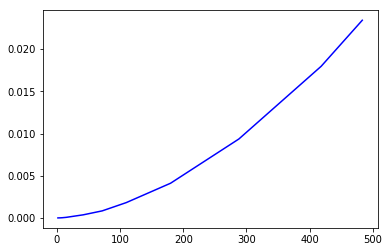

In [28]:
from imports import maze
import time
import math
%matplotlib inline
import matplotlib.pyplot as plt
maze_size=[]
time_to_execute=[]
maze_shape=[(1,2),(2,3),(3,3),(5,3),(6,7),(8,9),(11,10),(12,15),(16,18),(19,22),(21,23)]
for i in range(len(maze_shape)):
    length,width=maze_shape[i]
    maze_graph=maze.generate_maze(length,width,0,True,False,0.5,5,"",0)
    start=time.time()
    Dijkstra(maze_graph[3],(0,0))
    time_to_execute.append(time.time()-start)
    maze_size.append(length*width)

plt.plot(maze_size,time_to_execute,color="blue")